# Analyzing exam scores

Now let's now move on to the competition and challenge.

## 📖 Background
Your best friend is an administrator at a large school. The school makes every student take year-end math, reading, and writing exams.

Since you have recently learned data manipulation and visualization, you suggest helping your friend analyze the score results. The school's principal wants to know if test preparation courses are helpful. She also wants to explore the effect of parental education level on test scores. 

## 💾 The data

#### The file has the following fields ([source](http://roycekimmons.com/tools/generated_data/exams)):
- "gender" - male / female
- "race/ethnicity" - one of 5 combinations of race/ethnicity
- "parent_education_level" -  highest education level of either parent
- "lunch" - whether the student receives free/reduced or standard lunch
- "test_prep_course" - whether the student took the test preparation course
- "math" -  exam score in math 
- "reading" -  exam score in reading 
- "writing" -  exam score in writing 

In [4]:
df.head()

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 💪 Challenge
Create a report to answer the principal's questions. Include:

1. What are the average reading scores for students with/without the test preparation course?
2. What are the average scores for the different parental education levels?
3. Create plots to visualize findings for questions 1 and 2.
4. [Optional] Look at the effects within subgroups. Compare the average scores for students with/without the test preparation course for different parental education levels (e.g., faceted plots).
5. [Optional 2] The principal wants to know if kids who perform well on one subject also score well on the others. Look at the correlations between scores. 
6. Summarize your findings.

## 💡 Learn more

The following DataCamp courses can help review the skills needed for this challenge:

* [Data Manipulation with pandas](https://www.datacamp.com/courses/data-manipulation-with-pandas)
* [Introduction to Data Visualization with Seaborn](https://www.datacamp.com/courses/introduction-to-data-visualization-with-seaborn)
* [Introduction to Statistics in Python](https://www.datacamp.com/courses/introduction-to-statistics-in-python)

## ✅ Checklist before publishing
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the introduction to data science notebooks, so the workbook is focused on your story.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
results = pd.read_csv('data/exams.csv')
results.head()

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
results.shape

(1000, 8)

In [5]:
results.isna().sum()

gender                    0
race/ethnicity            0
parent_education_level    0
lunch                     0
test_prep_course          0
math                      0
reading                   0
writing                   0
dtype: int64

In [6]:
results.duplicated().any()

False

In [7]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   gender                  1000 non-null   object
 1   race/ethnicity          1000 non-null   object
 2   parent_education_level  1000 non-null   object
 3   lunch                   1000 non-null   object
 4   test_prep_course        1000 non-null   object
 5   math                    1000 non-null   int64 
 6   reading                 1000 non-null   int64 
 7   writing                 1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
# Checking out suitable columns to convert to categories
columns = results.columns
for i in columns:
    length = results[f'{i}'].nunique()
    if length <= 10:
        print(f'\t\t{i}\n', results[f'{i}'].unique())
        print()

		gender
 ['female' 'male']

		race/ethnicity
 ['group B' 'group C' 'group A' 'group D' 'group E']

		parent_education_level
 ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

		lunch
 ['standard' 'free/reduced']

		test_prep_course
 ['none' 'completed']



In [9]:
# Function to change column to category

def categorize(column):
    results[column] = results[column].astype('category')
    
    
categorize('lunch')
categorize('gender')
categorize('test_prep_course')
categorize('race/ethnicity')
categorize('parent_education_level')

In [10]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   gender                  1000 non-null   category
 1   race/ethnicity          1000 non-null   category
 2   parent_education_level  1000 non-null   category
 3   lunch                   1000 non-null   category
 4   test_prep_course        1000 non-null   category
 5   math                    1000 non-null   int64   
 6   reading                 1000 non-null   int64   
 7   writing                 1000 non-null   int64   
dtypes: category(5), int64(3)
memory usage: 29.2 KB


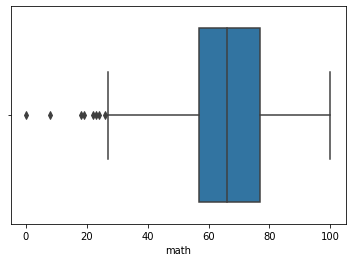

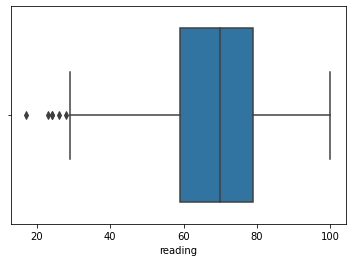

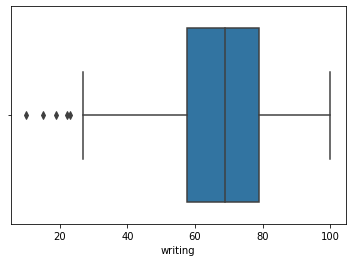

In [11]:
# Checking for outliers

for outlier in columns:
    if results[f'{outlier}'].dtype == 'int64':
        sns.boxplot(x=outlier,data=results)
        plt.show()
    # else:
    #     value = results[f'{outlier}'].value_counts()      
    #     sns.boxplot(x=value,data=results)
    #     plt.show() 

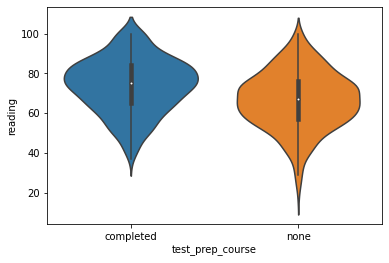

In [12]:
sns.violinplot(x='test_prep_course', y='reading', data=results)
plt.show()

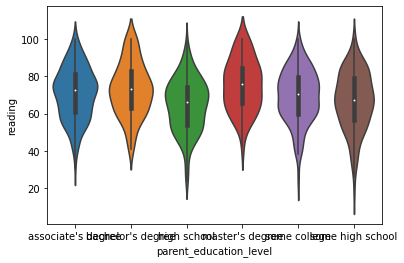

<Figure size 2160x504 with 0 Axes>

In [19]:
sns.violinplot(x='parent_education_level', y='reading', data=results)
plt.figure(figsize=(30,7))
plt.show()

In [14]:
parent = results.groupby('parent_education_level').mean()
parent

,math,reading,writing
parent_education_level,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


In [22]:
read = results.groupby('test_prep_course').mean()
read

,math,reading,writing
test_prep_course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


<AxesSubplot:xlabel='reading', ylabel='Count'>

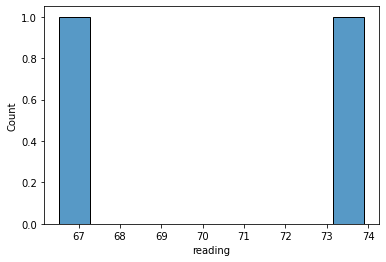

In [25]:
sns.histplot(x='reading', data=read,bins=10)

<AxesSubplot:ylabel='Count'>

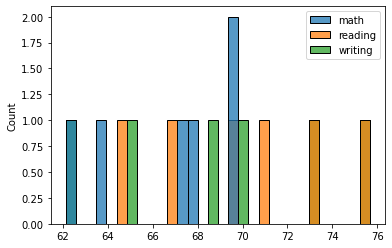

In [28]:
sns.histplot(data=parent, bins=30)

In [32]:
parent['math']

parent_education_level
associate's degree    67.882883
bachelor's degree     69.389831
high school           62.137755
master's degree       69.745763
some college          67.128319
some high school      63.497207
Name: math, dtype: float64

		 MATH


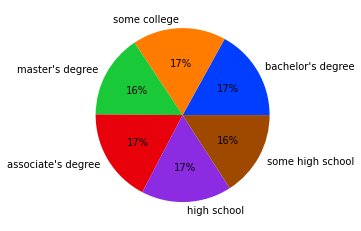

		 READING


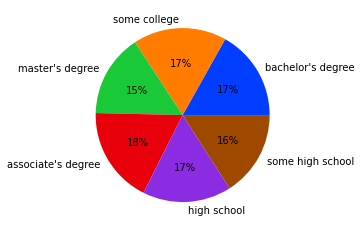

		 WRITING


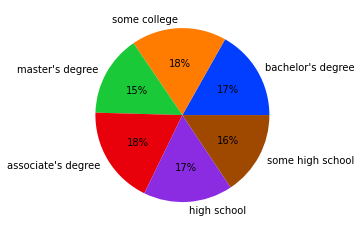

In [61]:


#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:6]
cols = parent.columns
cols2 = [i for i in results['parent_education_level'].unique()]

#create pie chart
for pies in cols:
#     print(parent[pies])
    # break
    print(f'\t\t {pies.upper()}')
    plt.pie(parent[pies], labels=cols2 , colors = colors, autopct='%.0f%%')
    plt.show()

In [56]:
cols2

["bachelor's degree",
 'some college',
 "master's degree",
 "associate's degree",
 'high school',
 'some high school']

In [ ]:
import seaborn as sns

sns.catplot(x='lunch', y='writing', col='gender', data=df, kind='bar');